## Export Test Data For Google AutoML

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [2]:
dataset = pd.read_csv("../../data_processed/webhose_google_news_2019_06_28.csv")

In [3]:
dataset.shape

(8526, 11)

In [4]:
dataset_test = dataset[dataset["month"] > 5]

In [5]:
dataset_test = dataset_test[dataset_test["label"] >= 0]

In [6]:
dataset_test.to_csv("dataset_oos_google.csv", index=False)

Reading Output from Google AutoML predictions

In [15]:
predict_test = pd.read_csv("predictions.csv")

In [16]:
dataset_test.reset_index(drop=True, inplace=True)

In [17]:
def set_prediction_class(row):
    if row[1] > row[0]:
        return 1
    elif row[1] == -9999:
        return None
    else:
        return 0

In [13]:
dataset_test["pred"] = predict_test.apply(set_prediction_class, axis=1)

Remove prediction errors

In [26]:
dataset_test = dataset_test[["domain", "label", "pred"]].dropna(how="any")

Calculating percentage of each side for each source

In [28]:
data_grouped = []
for name, group in dataset_test.groupby("domain"):
    conservative_count = group["pred"].sum()
    total = group.shape[0]
    liberal_count =  total - conservative_count
    side = "conservative" if group["label"].max() == 1 else "liberal"
    data_grouped.append({
        "domain": name,
        "liberal": liberal_count,
        "conservative": conservative_count,
        "side": side,
        "total": total
    })
data_grouped = pd.DataFrame(data_grouped).sort_values("total", ascending=False).head(4)

In [29]:
data_grouped

,conservative,domain,liberal,side,total
2,215.0,dailywire.com,7.0,conservative,222
8,13.0,slate.com,138.0,liberal,151
11,131.0,theblaze.com,13.0,conservative,144
12,120.0,thefederalist.com,7.0,conservative,127


In [30]:
data_grouped["conservative"] = data_grouped["conservative"] / data_grouped["total"] * 100
data_grouped["liberal"] = data_grouped["liberal"] / data_grouped["total"] * 100

[Text(0, 0.5, 'Percentage'),
 Text(0.5, 0, 'Sources'),
 Text(0.5, 1.0, 'Auto ML')]

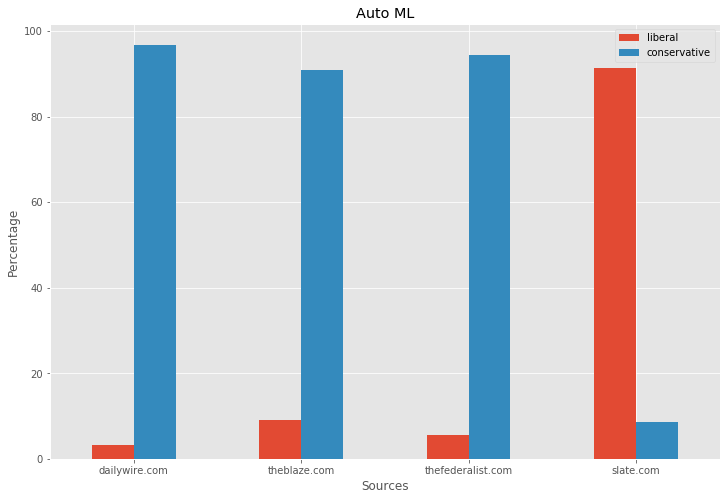

In [31]:
data_grouped = data_grouped.sort_values("side")
ax = data_grouped[["liberal", "conservative", "domain"]].plot(kind="bar", x="domain", rot=0, figsize=(12,8));
ax.set(xlabel="Sources", ylabel="Percentage", title="Auto ML")